# Modell Evaluierung
Wie sollen die Hyperparameter ausgewählt werden?
- Grid-Search: Man definiert eine endliche Menge von Werten die durchprobiert werden
- Random-Search: Man wählt eine Zufallsverteilung und testet diese Samples
- Kreuzvalidierung / Cross Validation
  - Bei großen Datensätzen sind die Daten ausreichend um auf eine Kreuzvalidierung zu verzichten

## Data preparation

In [34]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [35]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}")

x_train shape: (455, 30)
x_test shape: (114, 30)


## Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [37]:
kf = KFold(n_splits = 10, shuffle = True)
clf = KNeighborsClassifier(n_neighbors = 3)

scores = cross_val_score(clf, x_train, y_train, cv = kf, n_jobs = -1)
predictions = cross_val_predict(clf, x_train, y_train, cv = kf, n_jobs = -1)
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Accuracies: {scores}")
print(f"Mean Score: {mean_score}")
print(f"Std Score: {std_score}")

Accuracies: [0.95652174 0.93478261 0.93478261 0.93478261 0.89130435 0.95555556
 0.88888889 0.95555556 0.91111111 0.91111111]
Mean Score: 0.9274396135265702
Std Score: 0.024318093954401817


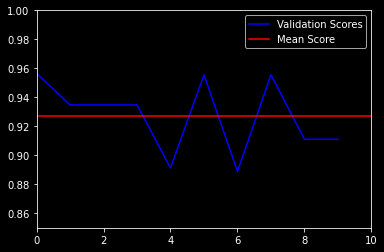

In [38]:
plt.plot(range(len(scores)), scores, color = "blue")
plt.xlim(0, 10)
plt.ylim(0.85, 1)
plt.axhline(mean_score, linestyle = "-", color = "red")
plt.legend(["Validation Scores", "Mean Score"])
plt.show()